In [2]:
import os
cwd = os.getcwd()
print(cwd)

/Users/wurobin/Documents/Myfolder/機器學習/Python_train


In [3]:
a = !pwd
a
#print("{0}".format(a))

['/Users/wurobin/Documents/Myfolder/機器學習/Python_train']

In [4]:
# Load in our libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

Matplotlib is building the font cache; this may take a moment.


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_dn = train.drop("Cabin", axis=1)
train_dn = train_dn.dropna()
train_dn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [7]:
train_dn.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [8]:
train_dn.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.0,448.589888,258.683191,1.00,222.75,445.00000,677.25,891.0000
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.00,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.00,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.00,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.00,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.00,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.00,512.3292


In [9]:
train_dn.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S


In [10]:
train_dn_label = train_dn["Fare"]
train_dn_data = train_dn.drop('Fare',axis=1)

train_dn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Embarked     712 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 61.2+ KB


In [26]:
Q1 = train_dn.quantile(0.25)
Q3 = train_dn.quantile(0.75)
IQR = Q3 - Q1

a = Q1
print("{0} \n".format(a))

a = Q3
print("{0} \n".format(a))

a = IQR
print("{0} \n".format(a))

PassengerId    222.75
Survived         0.00
Pclass           1.00
Age             20.00
SibSp            0.00
Parch            0.00
Fare             8.05
Name: 0.25, dtype: float64 

PassengerId    677.25
Survived         1.00
Pclass           3.00
Age             38.00
SibSp            1.00
Parch            1.00
Fare            33.00
Name: 0.75, dtype: float64 

PassengerId    454.50
Survived         1.00
Pclass           2.00
Age             18.00
SibSp            1.00
Parch            1.00
Fare            24.95
dtype: float64 



In [27]:
train_dn = train_dn[ (train_dn["Fare"]>=Q1["Fare"]-IQR["Fare"]*1.5) & (train_dn["Fare"]<=Q3["Fare"]+IQR["Fare"]*1.5)]



In [28]:
train_dn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  617 non-null    int64  
 1   Survived     617 non-null    int64  
 2   Pclass       617 non-null    int64  
 3   Name         617 non-null    object 
 4   Sex          617 non-null    object 
 5   Age          617 non-null    float64
 6   SibSp        617 non-null    int64  
 7   Parch        617 non-null    int64  
 8   Ticket       617 non-null    object 
 9   Fare         617 non-null    float64
 10  Embarked     617 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 57.8+ KB


In [29]:
train_dn.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S


In [30]:
#train_dn['Mrs'] = train_dn["Name"].apply(lambda x: 1 if any(y in x for y in ("Mrs","Miss","Lady")) else 0)
#train_dn['Female_2'] = train_dn['Sex'].apply(lambda x: '1' if x=="female" else '0')
train_dn.loc[train_dn['Sex'] != 'female', 'Female'] = '0'  
train_dn.loc[train_dn['Sex'] == 'female', 'Female'] = '1'  

In [31]:
train_dn.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,0


In [32]:
train_dn = pd.get_dummies(train_dn, columns=["Embarked"])

In [33]:
train_dn.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Female,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,1,0,0,1


In [35]:
from sklearn import tree

y = train_dn["Survived"]

x = train_dn.drop(["Survived","Name","Sex","Ticket"],axis=1)

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'
fig, ax = plt.subplots(figsize=(10, 10), facecolor='k')

#tree.export_graphviz(clf)
tree.plot_tree(clf) 
plot_tree(clf, rotate=True, ax=ax); 
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 




In [ ]:
train_dn_label = train_dn["Fare"]
train_dn_data = train_dn.drop('Fare',axis=1)

train_dn_data.info()

<AxesSubplot:>

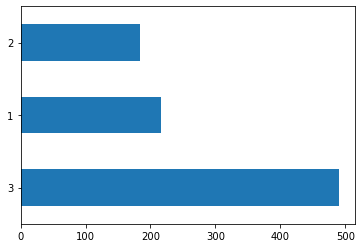

In [11]:
train['Pclass'].value_counts()
train['Pclass'].value_counts().plot(kind='barh')

### dropna 排掉特定欄位有null的資料列

In [12]:
train_exclude_age_null = train.dropna(subset=["Age"])
train_exclude_age_null = train_exclude_age_null.dropna(subset=["Embarked"])
train.dropna(subset=["Age"]).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_exclude_age_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


### 把欄位轉為Dummy欄位

In [14]:
train_exclude_age_null_dummy = pd.get_dummies(train_exclude_age_null, columns=['Sex','Embarked'])
train_exclude_age_null_dummy.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1


### exclude outlier

In [15]:
print(train_exclude_age_null_dummy.describe())


Q1 = train_exclude_age_null_dummy.quantile(0.25)
Q3 = train_exclude_age_null_dummy.quantile(0.75)
IQR = Q3 - Q1

print(Q1["Fare"])
print(Q3["Fare"])
print(IQR["Fare"])

IQR

       PassengerId    Survived      Pclass         Age       SibSp  \
count   712.000000  712.000000  712.000000  712.000000  712.000000   
mean    448.589888    0.404494    2.240169   29.642093    0.514045   
std     258.683191    0.491139    0.836854   14.492933    0.930692   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.750000    0.000000    1.000000   20.000000    0.000000   
50%     445.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.250000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    5.000000   

            Parch        Fare  Sex_female    Sex_male  Embarked_C  Embarked_Q  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     0.432584   34.567251    0.363764    0.636236    0.182584    0.039326   
std      0.854181   52.938648    0.481420    0.481420    0.386597    0.194506   
min      0.000000    0.000000    0.000000    

PassengerId    454.50
Survived         1.00
Pclass           2.00
Age             18.00
SibSp            1.00
Parch            1.00
Fare            24.95
Sex_female       1.00
Sex_male         1.00
Embarked_C       0.00
Embarked_Q       0.00
Embarked_S       0.00
dtype: float64

In [16]:
train_exclude_age_null_dummy_exclude_fare_outlier = train_exclude_age_null_dummy[(train_exclude_age_null_dummy["Fare"]>=Q1["Fare"]-IQR["Fare"]*1.5) & (train_exclude_age_null_dummy["Fare"]<=Q3["Fare"]+IQR["Fare"]*1.5)]



In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
reg = linear_model.LinearRegression()

#x = train_exclude_age_null_dummy[["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]]#age & deposit_amt
x = train_exclude_age_null_dummy_exclude_fare_outlier[["Pclass","Age","SibSp","Parch","Sex_female","Sex_male"]]#age & deposit_amt
y = train_exclude_age_null_dummy_exclude_fare_outlier[["Fare"]]


reg.fit(x,y)

LinearRegression()

In [18]:
import pandas as pd

a = reg.intercept_
print("intercept: {0}".format(a))

a = reg.coef_
print("coef_: {0}".format(a))

a = x.columns
print("columns: {0}".format(a))

#pd.DataFrame(reg.coef_ , x.columns, columns=['Coeffecient'])

#pd.DataFrame([-1.31057293e+01,  2.95302816e-03,  5.18698534e+00,  4.38318886e+00,
#   9.46721139e-02, -9.46721139e-02] ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male'], columns=['Coeffecient'])

intercept: [46.45111791]
coef_: [[-1.31057293e+01  2.95302816e-03  5.18698534e+00  4.38318886e+00
   9.46721139e-02 -9.46721139e-02]]
columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male'], dtype='object')


In [19]:
a = train_exclude_age_null_dummy_exclude_fare_outlier['Fare'].head(3)
print("#1 {0}  \n".format(a))

a = train_exclude_age_null_dummy_exclude_fare_outlier.loc[:,['Fare']].head(3)
print("#2 {0}  \n".format(a))

train_exclude_age_null_dummy_exclude_fare_outlier.head(3)


#1 0     7.250
2     7.925
3    53.100
Name: Fare, dtype: float64  

#2      Fare
0   7.250
2   7.925
3  53.100  



,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.250,NaN,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.925,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.100,C123,1,0,0,0,1


In [20]:
np.random.randn(2)

array([-0.14368499,  1.27797225])

In [21]:
#train_exclude_age_null_dummy_exclude_fare_outlier.loc[:,['Fare']] 

#train_exclude_age_null_dummy_exclude_fare_outlier['Fare_pre'] = reg.predict(x)
#a = reg.predict(x).shape
#print("#0 {0}  \n".format(a))

#a = train_exclude_age_null_dummy_exclude_fare_outlier.loc[:,['Fare']].shape
#print("#1 {0}  \n".format(a))


#a = train_exclude_age_null_dummy_exclude_fare_outlier.loc[0:,['Fare']].shape
#print("#2 {0}  \n".format(a))

#a = reg.predict(x)
#print("#3 {0}  \n".format(a))

a_index = train_exclude_age_null_dummy_exclude_fare_outlier.index

#print("#4 {0}  \n".format(a_index))

#y_hats2 = model.predict(X)
#df['y_hats'] = y_hats2

#df1['e'] = pd.Series(np.random.randn(sLength), index=df1.index)


Fare_pre = pd.DataFrame(data=reg.predict(x), index=a_index, columns=['Fare_pre'])
a = Fare_pre.head(10)
print("{0}".format(a))



train_exclude_age_null_dummy_exclude_fare_outlier['Fare_pre'] = reg.predict(x)
#train_exclude_age_null_dummy_exclude_fare_outlier['Fare_pre'] = pd.DataFrame(reg.predict(x), index=a_index)
#train_exclude_age_null_dummy_exclude_fare_outlier.loc[0:,['Fare_pre']]  = Fare_pre 
#train_exclude_age_null_dummy_exclude_fare_outlier.loc[0:,['Fare_pre']] = reg.predict(x)
#train_exclude_age_null_dummy_exclude_fare_outlier.loc[a_index, ['Fare_pre']] = reg.predict(x)
#train_exclude_age_null_dummy_exclude_fare_outlier.loc[0:,['Fare_pre']] = pd.Series(reg.predict(x),index=train_exclude_age_null_dummy_exclude_fare_outlier.index)
train_exclude_age_null_dummy_exclude_fare_outlier.head(5)

#train_exclude_age_null_dummy_exclude_fare_outlier.merge(Fare_pre, right_on='PassengerId', right_on='Fare_pre')



     Fare_pre
0   12.291210
2    7.305381
3   38.730402
4    7.142614
6   33.410180
7   26.989309
8   16.074712
9   25.562659
10  16.810588
11  33.611336


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_pre
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,12.291210
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,7.305381
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,38.730402
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,7.142614
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,1,0,0,1,33.410180


In [22]:
reg.score(x,y) #驗證模型正確性,不同模型有不同的驗證指標
                     #linearRegression預設使用決定係數(R2)當作指標,越接近1越好

0.6250672811413549

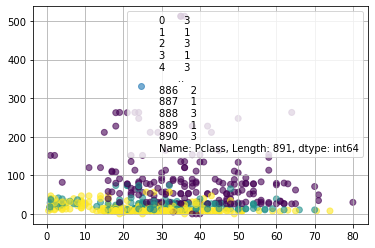

In [23]:
import matplotlib.pyplot as plt

plt.scatter(x=train['Age'], y=train['Fare'], c=train['Pclass'], label=train['Pclass'], alpha=0.6)
plt.legend()
plt.grid(True)
plt.show()

import numpy as np
np.random.seed(19680801)
import matplotlib.pyplot as plt


#train.head(3)
#train.describe()

In [24]:
train.head(2).T

,0,1
PassengerId,1,2
Survived,0,1
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,male,female
Age,22,38
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833


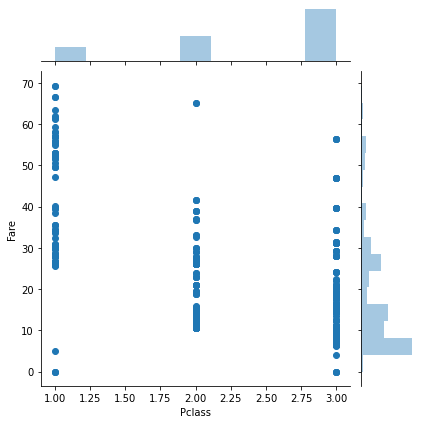

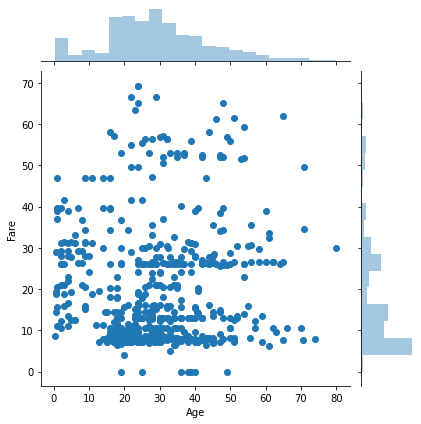

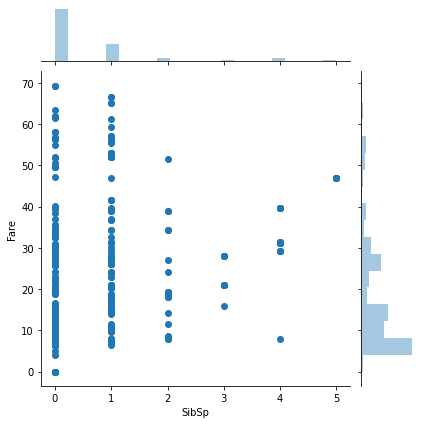

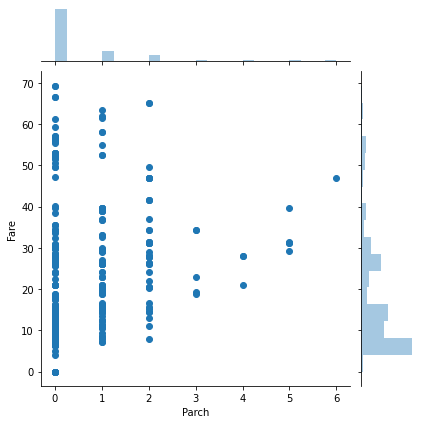

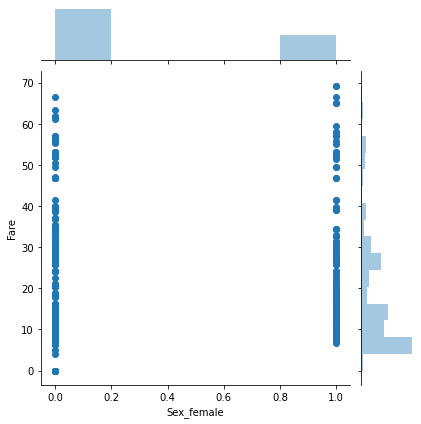

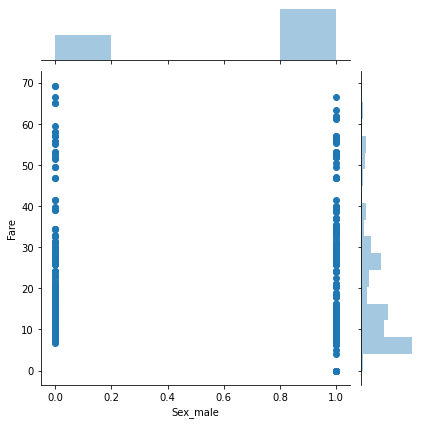

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

#columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male'], dtype='object
sns.jointplot(x='Pclass',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)
sns.jointplot(x='Age',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)
sns.jointplot(x='SibSp',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)
sns.jointplot(x='Parch',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)
sns.jointplot(x='Sex_female',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)
sns.jointplot(x='Sex_male',y ='Fare', data = train_exclude_age_null_dummy_exclude_fare_outlier)